# Project - 8 (Space Server) Dataset

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.


# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
#Data Visualziation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Loading The Dataset

In [3]:
df=pd.read_csv('spaceserver.csv')

In [4]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


Data Description by above content given with the data.

objid : Object Identifier

ra : J2000 Right Ascension (r-band)

dec : J2000 Declination (r-band)

u : better of DeV/Exp magnitude fit

g : better of DeV/Exp magnitude fit

r : better of DeV/Exp magnitude fit

i : better of DeV/Exp magnitude fit

z : better of DeV/Exp magnitude fit

run : Run Number

rereun : Rerun Number

camcol : Camera column

field : Field number

specobjid : Object Identifier

class : object class (galaxy, star or quasar object)

redshift : Final Redshift

plate : plate number

mjd : MJD of observation

fiberid : fiber ID



In [5]:
df.shape

(10000, 18)

We have 18 columns and 10000 rows  in our datase

In [6]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Apart from class all the data are in numerical form.

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.237650e+18    10000
Name: objid, dtype: int64


226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64


 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64


18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64


17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64


15.99986    3
16.48978    3
16.70929    2
17.21182    2
16.27899    2
           ..
19.18255    1
16.03177    1
16.27091    1
17.4532

value counts in each columns can be seen here also i noticed rerun contain only one unique value so we can drop that column as it is of no use for us in our analysis


In [9]:
df.drop(['rerun','objid'], inplace=True,axis=1)

In [10]:
df.isnull().sum() #checking null values

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

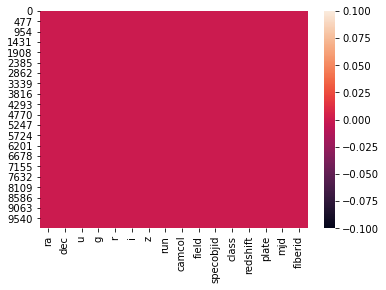

In [11]:
sns.heatmap(df.isnull())
plt.show()

Luckily no null values present in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  int64  
 8   camcol     10000 non-null  int64  
 9   field      10000 non-null  int64  
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  object 
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  int64  
 14  mjd        10000 non-null  int64  
 15  fiberid    10000 non-null  int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 1.2+ MB


10000 rows and 18 columns in our dataset

There are three types of Datatypes in our dataset

    i-   object - class
    ii-  int64 & float64 - objid, ra, dec, u, g, r, i,
         z, run, rerun, camcol, field, specobjid, redshift,  
         plate, mjd, fiberid

# Exploratory Data Analysis

In [13]:
df.corr() #checking correlation of data

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.040809,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,-0.093724,0.015414,-0.093723,-0.086558,-0.040493


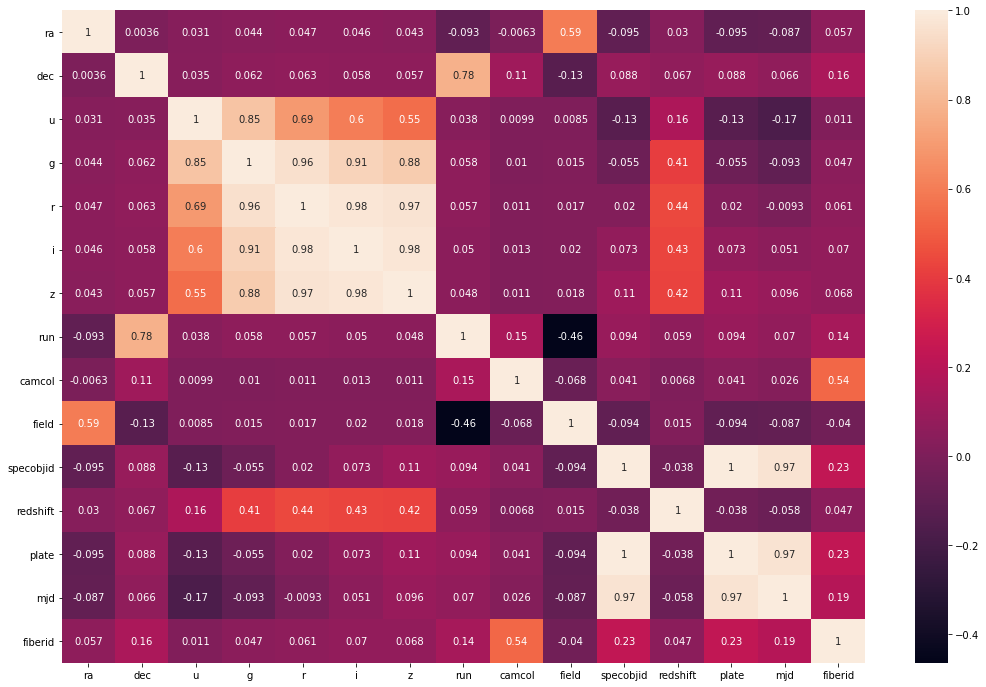

In [14]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)


Better of DeV/Exp magnitude fit (g,r,i,z) have strong positivecorrelation with each other.

plate and mjd have strong correlation with each other

Plate, mjd and u, g have low -ive correlation with each other.

Plate, mjd and spaceobjid have strong +ive correlation with each other.

plate, mjd have low -ive correlation with field

# Univariate analysis

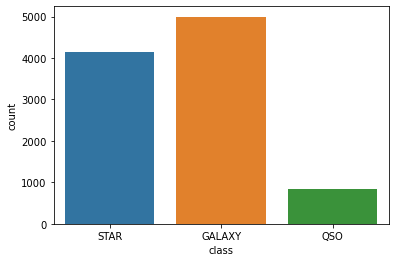

In [15]:
sns.countplot(x= 'class', data = df)
plt.show()

In [16]:
print(df['class'].value_counts())

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


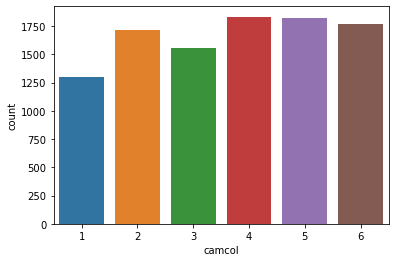

In [17]:
sns.countplot(x= 'camcol', data = df)
plt.show()

In [18]:
print(df['camcol'].value_counts())


4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


# Bivariate analysis

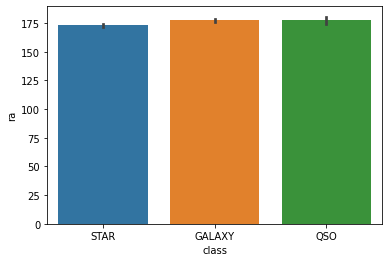

In [19]:
sns.barplot(x='class',y='ra',data=df)

star is lesser than galaxy and QS0

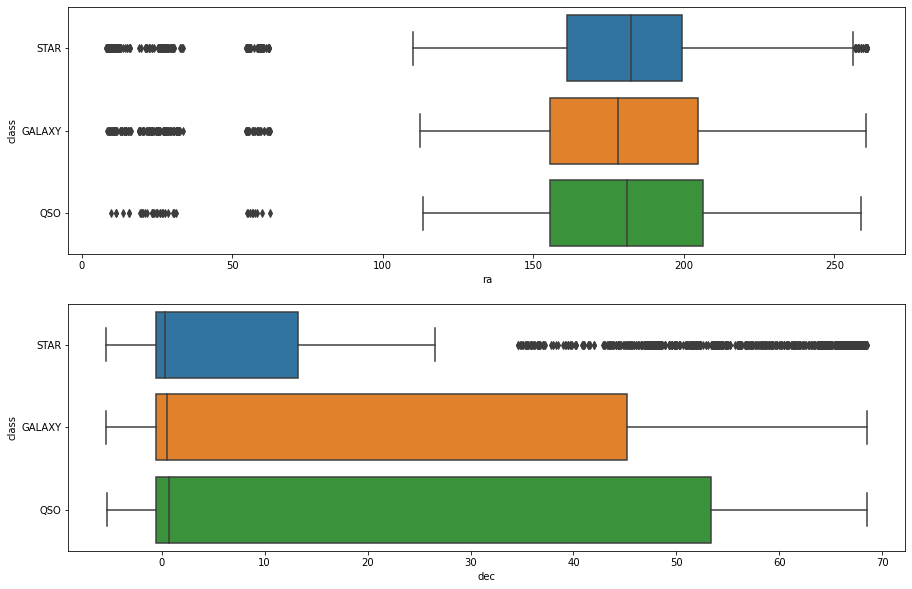

In [20]:
f, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(y='class', x='ra', data=df, ax=axes[0])
sns.boxplot(y='class', x='dec', data=df, ax=axes[1])


we have many outlier in dec and ra also data is almost normally distributed

In dec data is positively skewed and in Star there are outliers

Qso isnot clustered around the mean and data is spread.

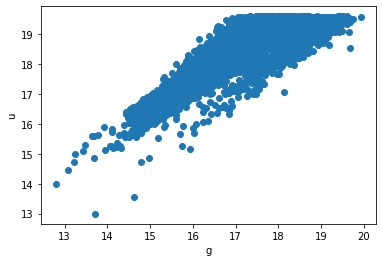

In [21]:
plt.scatter('g','u', data=df)
plt.xlabel('g')
plt.ylabel('u')
plt.show()

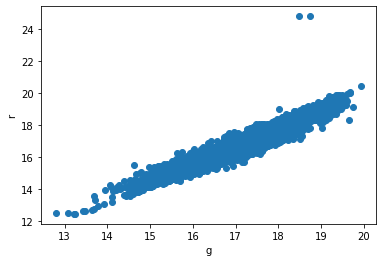

In [22]:
plt.scatter('g','r',data=df)
plt.xlabel('g')
plt.ylabel('r')
plt.show()

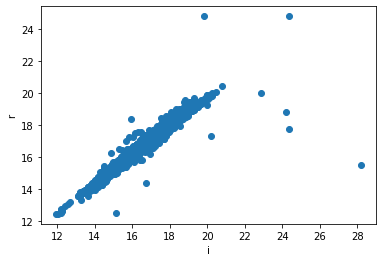

In [23]:
plt.scatter('i','r',data=df)
plt.xlabel('i')
plt.ylabel('r')
plt.show()

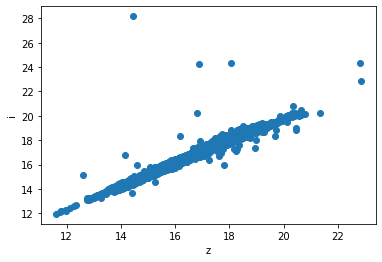

In [24]:
plt.scatter('z','i',data=df)
plt.xlabel('z')
plt.ylabel('i')
plt.show()

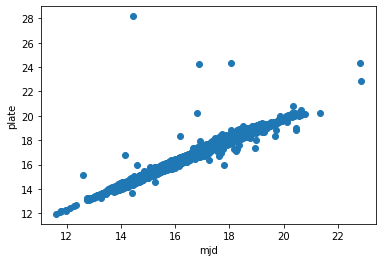

In [25]:
plt.scatter('z','i',data=df)
plt.xlabel('mjd')
plt.ylabel('plate')
plt.show()

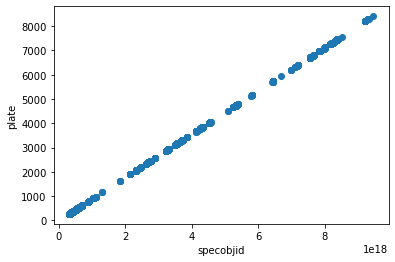

In [26]:
plt.scatter('specobjid','plate',data=df)
plt.xlabel('specobjid')
plt.ylabel('plate')
plt.show()

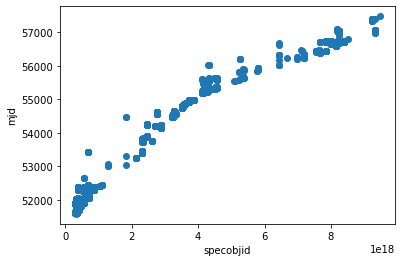

In [28]:
plt.scatter('specobjid','mjd',data=df)
plt.xlabel('specobjid')
plt.ylabel('mjd')
plt.show()

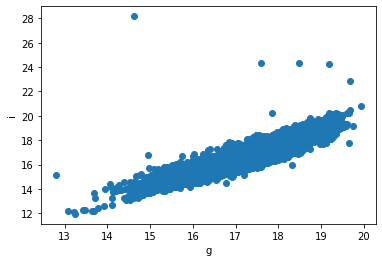

In [29]:
plt.scatter('g','i',data=df)
plt.xlabel('g')
plt.ylabel('i')
plt.show()

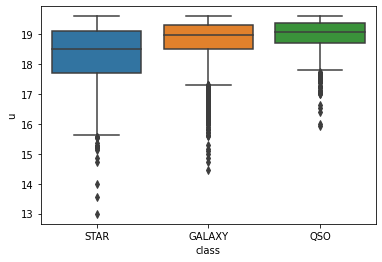

In [30]:
sns.boxplot(x = 'class', y = 'u', data = df)


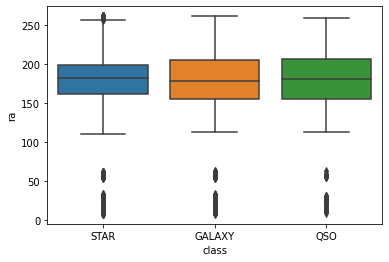

In [31]:
sns.boxplot(x = 'class', y = 'ra', data = df)


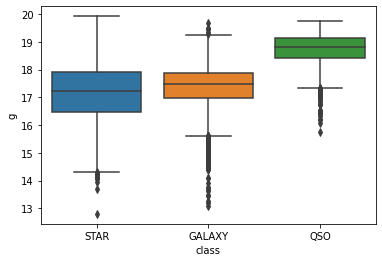

In [32]:
sns.boxplot(x = 'class', y = 'g', data = df)


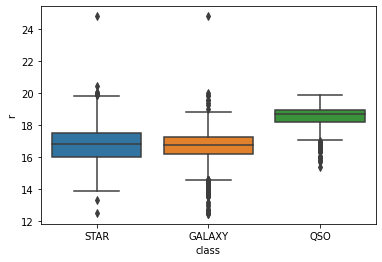

In [33]:
sns.boxplot(x = 'class', y = 'r', data = df)

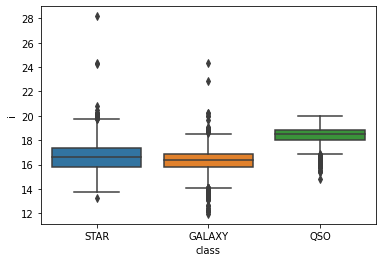

In [34]:
sns.boxplot(x = 'class', y = 'i', data = df)

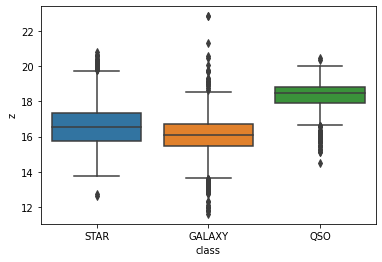

In [35]:
sns.boxplot(x = 'class', y = 'z', data = df)

Text(0.5, 1.0, 'Equatorial co-ordinates')

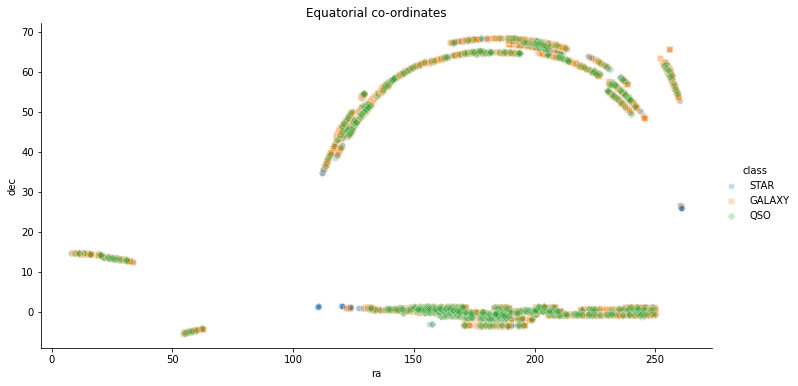

In [36]:
sns.pairplot(x_vars='ra', y_vars='dec', data=df, hue='class', size=5,
             aspect=2,markers=["o", "s", "D"],plot_kws={'alpha': 0.25})
plt.title('Equatorial co-ordinates')

 Right ascention and declination for each of our class types, we see that there is no clear seperation in the positions of our objects. We can say features will not add any real predictive value to our model and dropping them from our dataset.

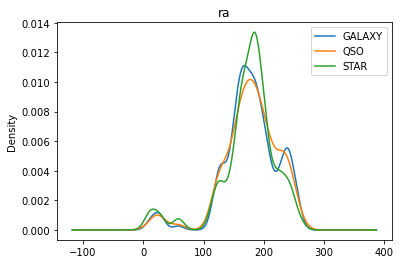

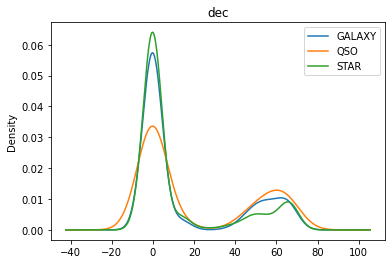

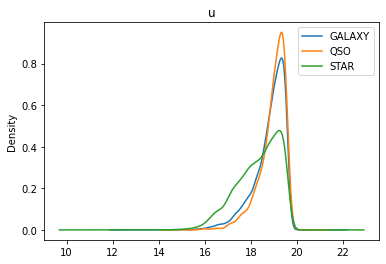

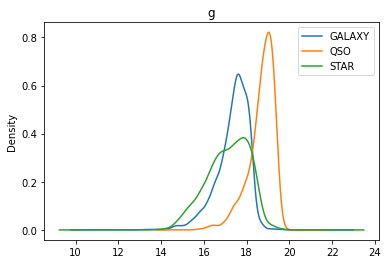

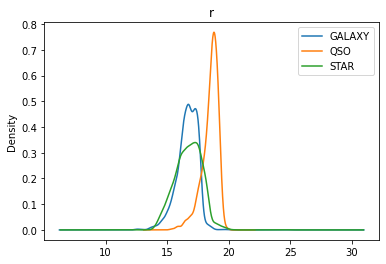

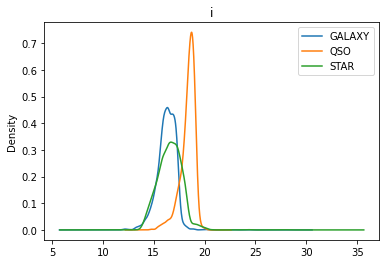

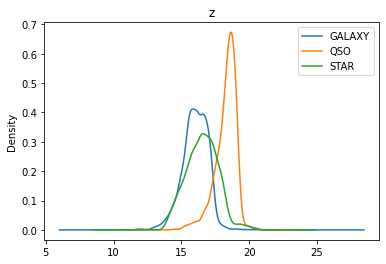

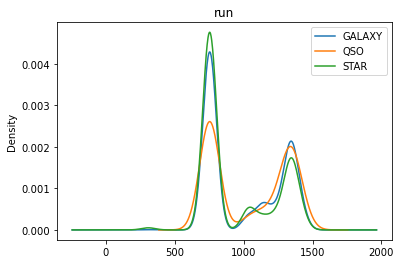

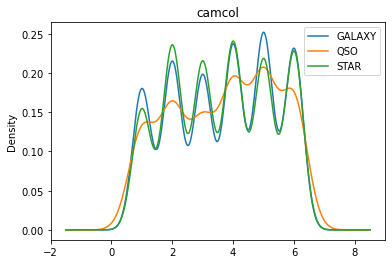

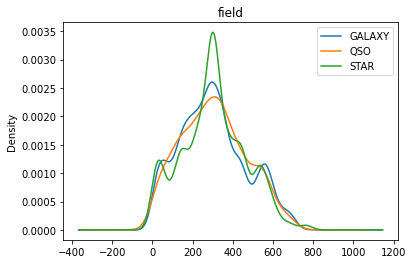

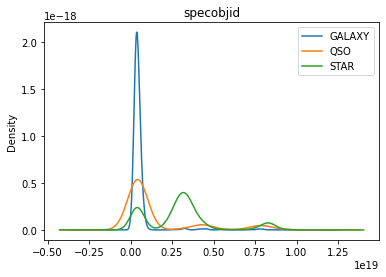

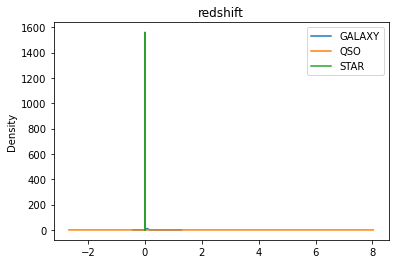

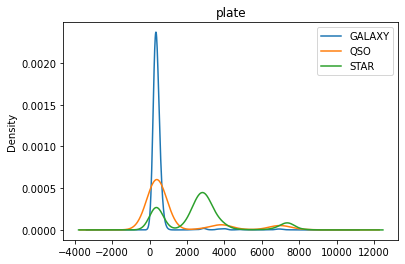

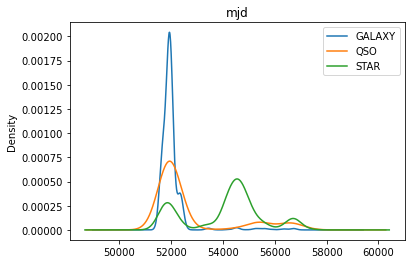

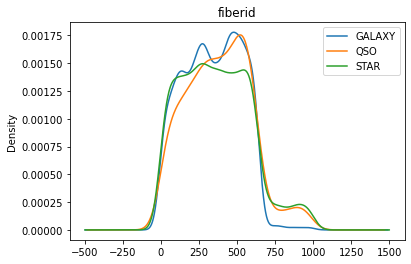

In [37]:
for column in df.columns:
    if column not in ['rerun','class']:
        df.groupby('class')[column].plot.kde()
        plt.title(column)
        plt.legend()
        plt.show()

No. of distributions are multi-modal and they have more than one typical values.

# Data Prepration for Model Training

In [38]:
df.drop(['ra','dec'], inplace=True,axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)
mappings

[{0: 12.98897,
  1: 13.551779999999999,
  2: 13.99371,
  3: 14.45856,
  4: 14.72825,
  5: 14.72858,
  6: 14.846260000000001,
  7: 14.87345,
  8: 15.002,
  9: 15.079920000000001,
  10: 15.1353,
  11: 15.1585,
  12: 15.198889999999999,
  13: 15.19925,
  14: 15.222079999999998,
  15: 15.245970000000002,
  16: 15.25174,
  17: 15.252889999999999,
  18: 15.259920000000001,
  19: 15.28501,
  20: 15.369520000000001,
  21: 15.51874,
  22: 15.551379999999998,
  23: 15.56055,
  24: 15.56296,
  25: 15.594439999999999,
  26: 15.60295,
  27: 15.61495,
  28: 15.615520000000002,
  29: 15.61899,
  30: 15.621210000000001,
  31: 15.62606,
  32: 15.643120000000001,
  33: 15.651539999999999,
  34: 15.68671,
  35: 15.691270000000001,
  36: 15.699539999999999,
  37: 15.700820000000002,
  38: 15.70475,
  39: 15.7049,
  40: 15.70621,
  41: 15.71824,
  42: 15.79229,
  43: 15.79393,
  44: 15.802679999999999,
  45: 15.8167,
  46: 15.8206,
  47: 15.820689999999999,
  48: 15.8452,
  49: 15.84934,
  50: 15.857339999

converted data via ncoding technique

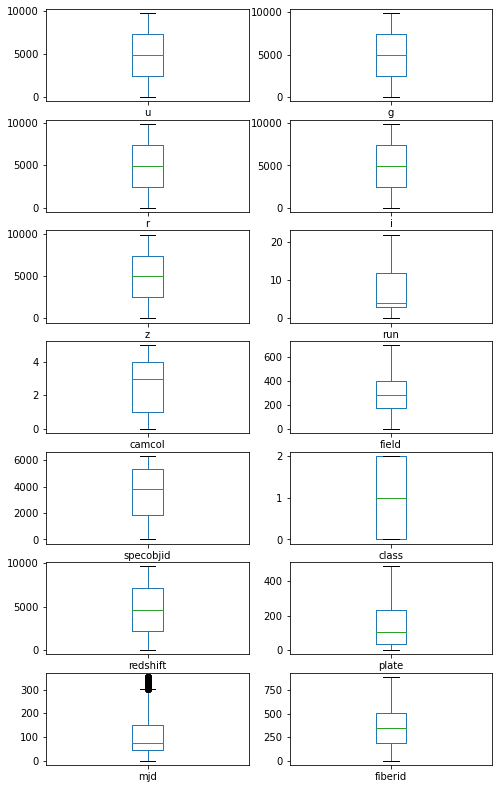

In [40]:
df.plot(kind='box',subplots=True,figsize=(8,20),layout=(10,2))
plt.show()


mjd have some outliers and  some of data is right skewed

# statistical summary

In [41]:
df.describe()

,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4910.907700,4917.34390,4924.639000,4943.933400,4948.006900,7.722200,2.648700,291.067600,3570.232600,0.915400,4707.003000,139.846600,100.648600,349.69640
std,2807.465864,2826.26928,2834.939299,2849.268611,2850.775034,5.870901,1.666183,161.891705,1898.270683,0.952856,2792.511903,120.185293,77.947945,200.52238
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2483.750000,2476.75000,2474.750000,2477.750000,2481.750000,3.000000,1.000000,173.000000,1872.750000,0.000000,2163.000000,35.000000,46.000000,185.75000
50%,4939.500000,4928.50000,4925.500000,4943.500000,4949.500000,4.000000,3.000000,288.000000,3862.500000,1.000000,4639.500000,105.000000,75.000000,350.00000
75%,7339.250000,7360.25000,7373.250000,7408.250000,7413.250000,12.000000,4.000000,403.000000,5327.000000,2.000000,7137.250000,230.000000,149.000000,509.00000
max,9729.000000,9816.00000,9851.000000,9889.000000,9895.000000,22.000000,5.000000,702.000000,6348.000000,2.000000,9636.000000,486.000000,354.000000,891.00000


all 1000 value counts are present

mean of data is lesser in most of columns.



In [42]:
df.skew()

u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.978221
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate        0.888700
mjd          1.177842
fiberid      0.150256
dtype: float64

treating skewness

In [43]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])


In [44]:
df.skew()

u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.448988
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate       -0.852625
mjd         -0.994669
fiberid      0.150256
dtype: float64

Removed the skewness from our dataset

# Model Prepration for Machine Learning

In [45]:
x = df.drop(['class'],axis=1)
y = df['class']

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [47]:
sc = StandardScaler()
x_train = sc.fit_transform(x)
x_train=pd.DataFrame(x_train,columns=x.columns)

Scaled data

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [49]:
x_train.shape

(7000, 13)

In [51]:
y_train.shape

(7000,)

In [52]:
from sklearn.linear_model import LogisticRegression


In [53]:
lg=LogisticRegression(C=10, random_state=42)
lg.fit(x_train,y_train)

LogisticRegression(C=10, random_state=42)

In [54]:
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.2f}%")

In [55]:
y_predict=lg.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[2 0 0 ... 2 2 2]

Confusion Matrix: 
 [[1420   53   35]
 [  88  166    0]
 [  33    8 1197]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1508
           1       0.73      0.65      0.69       254
           2       0.97      0.97      0.97      1238

    accuracy                           0.93      3000
   macro avg       0.87      0.85      0.86      3000
weighted avg       0.93      0.93      0.93      3000


Accuracy : 92.77%


In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
dtc.fit(x_train, y_train)
y_predict=dtc.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[2 1 0 ... 2 2 2]

Confusion Matrix: 
 [[1495    6    7]
 [  18  236    0]
 [   1    0 1237]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1508
           1       0.98      0.93      0.95       254
           2       0.99      1.00      1.00      1238

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Accuracy : 98.93%


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 2 2 2]

Confusion Matrix: 
 [[1481   11   16]
 [  14  240    0]
 [   7    0 1231]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1508
           1       0.96      0.94      0.95       254
           2       0.99      0.99      0.99      1238

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000


Accuracy : 98.40%


In [58]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_predict=gnb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 2 2 2]

Confusion Matrix: 
 [[1395   71   42]
 [  19  235    0]
 [  85    0 1153]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1508
           1       0.77      0.93      0.84       254
           2       0.96      0.93      0.95      1238

    accuracy                           0.93      3000
   macro avg       0.89      0.93      0.90      3000
weighted avg       0.93      0.93      0.93      3000


Accuracy : 92.77%


In [60]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
y_predict=adb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 0 0 ... 2 2 2]

Confusion Matrix: 
 [[1474   24   10]
 [ 249    5    0]
 [  13    0 1225]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1508
           1       0.17      0.02      0.04       254
           2       0.99      0.99      0.99      1238

    accuracy                           0.90      3000
   macro avg       0.67      0.66      0.64      3000
weighted avg       0.85      0.90      0.87      3000


Accuracy : 90.13%


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_predict=rfc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 2 2 2]

Confusion Matrix: 
 [[1498    4    6]
 [  14  240    0]
 [   0    0 1238]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1508
           1       0.98      0.94      0.96       254
           2       1.00      1.00      1.00      1238

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Accuracy : 99.20%


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 2 2 2]

Confusion Matrix: 
 [[1499    8    1]
 [  14  240    0]
 [   1    1 1236]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1508
           1       0.96      0.94      0.95       254
           2       1.00      1.00      1.00      1238

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Accuracy : 99.17%


In [63]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', lg),('Decision Tree',dtc),
        ('Random Forest',rfc),('GradientBoostingClassifier', gbc),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', adb)]

for model in models:
    results=model_selection.cross_val_score(model[1],x_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 92.93%
Cross validated Accuracy of Decision Tree: 98.70%
Cross validated Accuracy of Random Forest: 98.83%
Cross validated Accuracy of GradientBoostingClassifier: 98.89%
Cross validated Accuracy of KNeighborsClassifier: 97.63%
Cross validated Accuracy of GaussianNB: 92.01%
Cross validated Accuracy of AdaBoostClassifier: 85.47%


 GradientBoositngClassifier is best model for prediction for our this dataset


In [65]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],
    'n_estimators':[10],
    }
#params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy']}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   41.8s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [3, 5, 8], 'n_estimators': [10]},
             verbose=1)

In [66]:
grid_search_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, n_estimators=10, random_state=42)

# Gradient Boosting Classifier with our best result

In [69]:
gbc=GradientBoostingClassifier(learning_rate=0.15, max_depth=5, n_estimators=10,random_state=42)
gbc.fit(x_train,y_train)

y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 2 2 2]

Confusion Matrix: 
 [[1502    5    1]
 [  20  234    0]
 [   2    0 1236]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1508
           1       0.98      0.92      0.95       254
           2       1.00      1.00      1.00      1238

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Accuracy : 99.07%


GradientBoostingClassifier gives the best score of 99.07% and the model is also not suffering from Underfitting and Overfitting.

In [70]:
import joblib
joblib.dump(gbc,'Spaceserver.pkl')

['Spaceserver.pkl']